In [1]:
import psycopg2 as pg
import seaborn as sns
import pandas as pd
import numpy as np
from collections import defaultdict
from pprint import pprint
import itertools
from copy import deepcopy
import pickle

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression




import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
df = pd.read_csv('creditcard1.csv')
df

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
time      284807 non-null float64
v1        284807 non-null float64
v2        284807 non-null float64
v3        284807 non-null float64
v4        284807 non-null float64
v5        284807 non-null float64
v6        284807 non-null float64
v7        284807 non-null float64
v8        284807 non-null float64
v9        284807 non-null float64
v10       284807 non-null float64
v11       284807 non-null float64
v12       284807 non-null float64
v13       284807 non-null float64
v14       284807 non-null float64
v15       284807 non-null float64
v16       284807 non-null float64
v17       284807 non-null float64
v18       284807 non-null float64
v19       284807 non-null float64
v20       284807 non-null float64
v21       284807 non-null float64
v22       284807 non-null float64
v23       284807 non-null float64
v24       284807 non-null float64
v25       284807 non-null float64
v26  

In [7]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['time', 'amount']].describe()

,time,amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


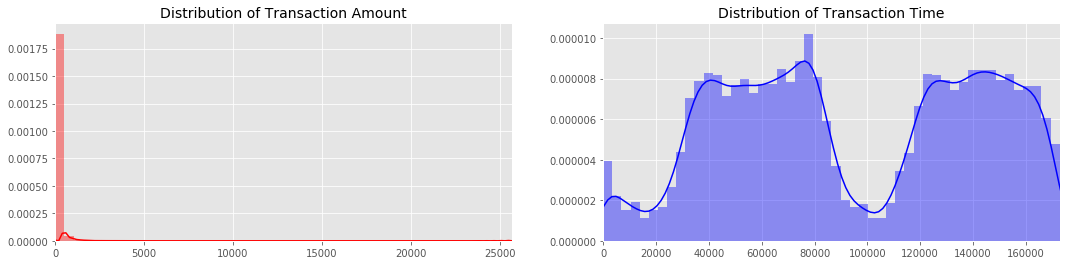

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['amount'].values
time_val = df['time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

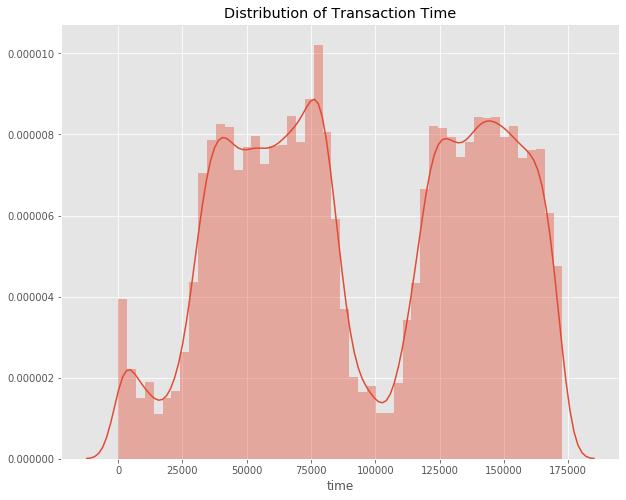

In [9]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Transaction Time')
sns.distplot(df.time)

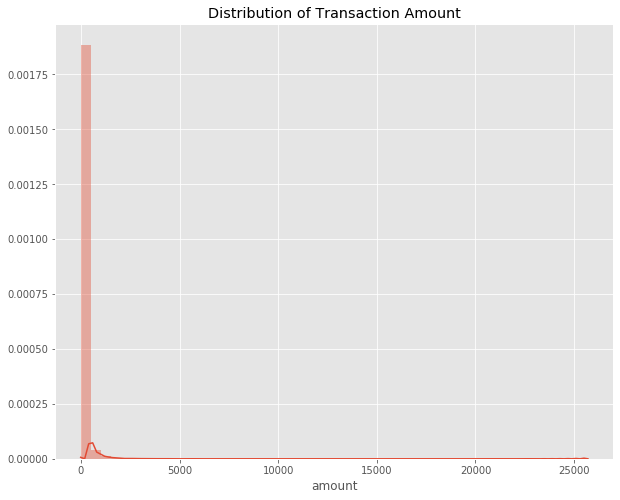

In [10]:
#Distribution of Monetary Value Feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Transaction Amount')
sns.distplot(df.amount)

In [11]:
#fraud vs. normal transactions 
counts = df['class'].value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

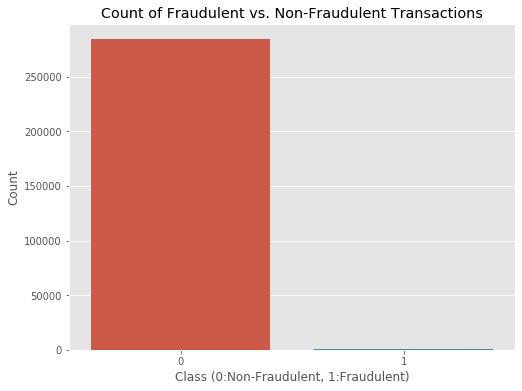

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [13]:
corr = df.corr()
corr

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
v1,0.117,1.000e+00,3.777e-12,-2.120e-12,-1.724e-13,-3.473e-12,-1.307e-13,-1.127e-13,2.115e-12,3.082e-14,...,-3.276e-12,2.282e-12,-2.972e-12,-1.030e-12,1.147e-12,1.835e-12,7.625e-12,-9.775e-13,-2.277e-01,-1.013e-01
v2,-0.011,3.777e-12,1.000e+00,2.327e-12,-2.315e-12,-1.833e-12,9.440e-13,5.403e-12,2.153e-14,3.239e-13,...,2.281e-12,-2.546e-13,-4.856e-12,6.431e-13,-9.428e-13,-4.129e-13,-9.858e-13,2.525e-12,-5.314e-01,9.129e-02
v3,-0.420,-2.120e-12,2.327e-12,1.000e+00,2.037e-13,-4.032e-12,-1.583e-13,3.405e-12,-1.272e-12,-6.820e-13,...,6.736e-13,-8.922e-13,4.147e-12,3.408e-12,5.718e-13,-2.577e-12,-5.042e-12,5.189e-12,-2.109e-01,-1.930e-01
v4,-0.105,-1.724e-13,-2.315e-12,2.037e-13,1.000e+00,-2.550e-13,1.084e-12,8.130e-13,7.338e-13,-7.138e-13,...,-2.696e-12,4.344e-13,-4.161e-12,-2.369e-12,1.620e-12,-3.045e-13,-1.456e-12,-2.832e-12,9.873e-02,1.334e-01
v5,0.173,-3.473e-12,-1.833e-12,-4.032e-12,-2.550e-13,1.000e+00,-6.988e-14,1.574e-11,-2.038e-12,-1.000e-12,...,-1.752e-12,7.098e-13,3.616e-12,-2.809e-13,1.452e-12,-1.896e-13,-2.125e-12,1.010e-11,-3.864e-01,-9.497e-02
v6,-0.063,-1.307e-13,9.440e-13,-1.583e-13,1.084e-12,-6.988e-14,1.000e+00,-2.799e-12,-5.446e-13,2.037e-12,...,1.477e-12,-1.145e-12,-1.528e-12,1.552e-12,-2.724e-12,3.351e-12,1.481e-12,-6.072e-13,2.160e-01,-4.364e-02
v7,0.085,-1.127e-13,5.403e-12,3.405e-12,8.130e-13,1.574e-11,-2.799e-12,1.000e+00,5.529e-12,5.086e-13,...,2.788e-12,-8.134e-13,-4.292e-12,-2.554e-12,-7.410e-13,-4.476e-12,-1.329e-11,2.956e-13,3.973e-01,-1.873e-01
v8,-0.037,2.115e-12,2.153e-14,-1.272e-12,7.338e-13,-2.038e-12,-5.446e-13,5.529e-12,1.000e+00,-2.243e-12,...,-4.022e-12,-2.680e-12,9.013e-13,-1.074e-12,-3.269e-12,1.044e-12,-3.500e-12,1.867e-12,-1.031e-01,1.988e-02
v9,-0.009,3.082e-14,3.239e-13,-6.820e-13,-7.138e-13,-1.000e-12,2.037e-12,5.086e-13,-2.243e-12,1.000e+00,...,3.040e-12,-7.470e-13,-1.011e-12,8.577e-13,-1.589e-12,-7.738e-13,2.429e-12,-1.406e-12,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Heatmap of Correlation')

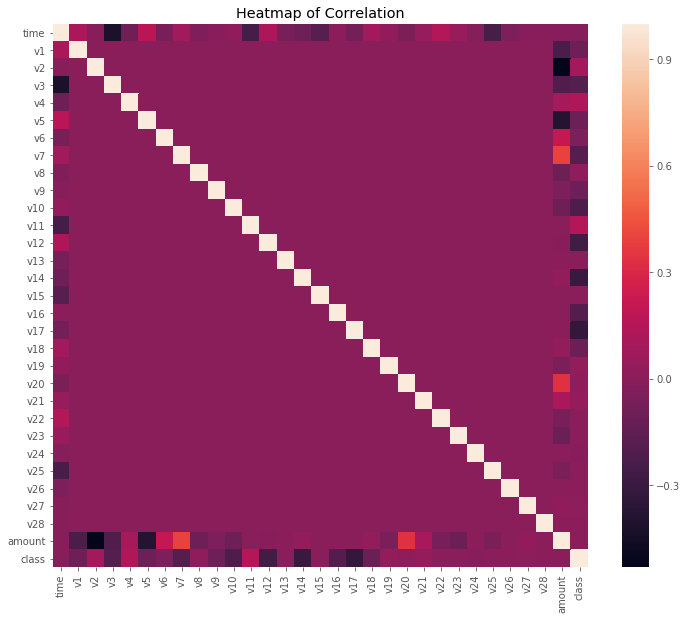

In [14]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [15]:
#skewness
skew_ = df.skew()
skew_

time      -0.036
v1        -3.281
v2        -4.625
v3        -2.240
v4         0.676
v5        -2.426
v6         1.827
v7         2.554
v8        -8.522
v9         0.555
v10        1.187
v11        0.357
v12       -2.278
v13        0.065
v14       -1.995
v15       -0.308
v16       -1.101
v17       -3.845
v18       -0.260
v19        0.109
v20       -2.037
v21        3.593
v22       -0.213
v23       -5.875
v24       -0.552
v25       -0.416
v26        0.577
v27       -1.170
v28       11.192
amount    16.978
class     23.998
dtype: float64

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
#taking a look at correlations once more
corr = df.corr()
corr = corr[['class']]
corr

,class
time,-1.232e-02
v1,-1.013e-01
v2,9.129e-02
v3,-1.930e-01
v4,1.334e-01
v5,-9.497e-02
v6,-4.364e-02
v7,-1.873e-01
v8,1.988e-02
v9,-9.773e-02


### Time for Train-Test-Split
### 60% Training
### 20% Validation
### 20% Test
### Notes on using StandardScaler
### StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1.    In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in normal distribution. It is more useful in classification than regression. You can read this blog of mine.

### StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

### Normalizer : It squeezes the data between 0 and 1. It performs normalization. Due to the decreased range and magnitude, the gradients in the training process do not explode and you do not get higher values of loss. Is more useful in regression than classification

In [18]:
#drop the predicted column
data = df.drop(columns=['class'])
answer = df['class']

### Data Split

In [19]:
from sklearn.preprocessing import StandardScaler

X_break, X_test, y_break, y_test = train_test_split(data, answer, \
                                                    test_size=0.2, stratify=df['class'],
                                                    random_state=42)

#random_state generates a set kind of deck for each random state. 42 will always be the same kind of split
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.25, stratify=y_break,
                                                    random_state=42)
# Initialize fit StandardScaler
#std_scale = StandardScaler().fit(X_train)

# Scale data
#X_train_std = std_scale.transform(X_train)
#X_val_std = std_scale.transform(X_val)
#X_test_std = std_scale.transform(X_test)

In [20]:
lm = LogisticRegression(C = 100)
lm.fit(X_train, y_train)
print("Logistic score: {:6.4f}".format(lm.score(X_val,y_val)))

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic score: 0.9988


In [21]:
X_train.shape

(170883, 30)

In [22]:
X_val.shape

(56962, 30)

In [23]:
X_test.shape

(56962, 30)

In [24]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [25]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = lm.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.7253,   Recall: 0.6735


In [26]:
# using the new threshold of 0.06
y_predict = (lm.predict_proba(X_test)[:,1] > 0.3)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.06:
Precision: 0.5197,   Recall: 0.6735


In [27]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [28]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(lm, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

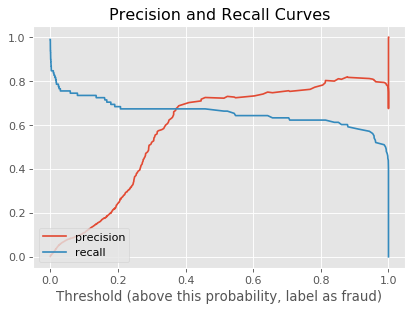

In [29]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [30]:
def find_best_threshold(model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict_proba(X_val)[:, 1] >= threshold) 
        f1 = f1_score(y_val,y_predict)
        acc = accuracy_score(y_val,y_predict)
        rec = recall_score(y_val,y_predict)
        pre = precision_score(y_val,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [31]:
models = [lm]
model_names = ["Logistic Regression"]
chart = list()
for item,name in zip(models,model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item,25)
#     print(f'Results for {name}:')
#     print('Best Threshold: ', best_thresh)
#     print('Highest_f1: ', high_f1)
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold','F1 Score','Accuracy','Recall','Precision'])

In [33]:
chart

,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.833,0.62,0.999,0.495,0.831


### To deal with the imbalanced classes, we will use undersampling

In [34]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_sample(X_train,y_train)
X_val_under, y_val_under = RandomUnderSampler(random_state=42).fit_sample(X_val,y_val)
Counter(y_val_under)
Counter(y_train_under )

Counter({0: 295, 1: 295})

### KNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_best = knn.fit(X_train_under, y_train_under)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train_under, y_train_under)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_val_under, y_val_under)))


The score for kNN is
Training:  75.25%
Validation set:  66.16%


In [36]:
y_predict = knn.predict(X_test)
f1_score(y_test, y_predict)

0.006421591437878083

### SVM

In [37]:
from sklearn import svm
support_vector = svm.LinearSVC()
svm_best = support_vector.fit(X_train_under, y_train_under)
print("The score for Support Vector is")
print("Training: {:6.2f}%".format(100*support_vector.score(X_train_under, y_train_under)))
print("Validation set: {:6.2f}%".format(100*support_vector.score(X_val_under, y_val_under)))

The score for Support Vector is
Training:  50.00%
Validation set:  50.00%


C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
y_predict = support_vector.predict(X_test)
f1_score(y_test, y_predict)

0.0034355828220858893

### Logistic Regression

In [39]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_under, y_train_under)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train_under, y_train_under)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_val_under, y_val_under)))

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  93.73%
Validation set:  90.40%


### Logistic Regression

In [40]:
from sklearn import linear_model

penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=2, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_under, y_train_under)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.8s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

### Naive Bayes

In [41]:
# Fit a Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)

### Random Forest

In [42]:
# Run CV with 5 folds (Random Forest)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [50, 70]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=2, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1950s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  36 out of  48 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.5s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

### Dummy Classifier

In [43]:
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

### Find ROC scores for all models

In [44]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

def roc_scores(X_value, Y_value):
    #in sample
    model_list = [logistic_grid.best_estimator_, 
#                   svm_grid.best_estimator_, 
                  gnb_best,
                  rf_grid.best_estimator_,
                  dummy,knn_best
                 ]

    model_name = ['Logit','Naive Bayes','Random Forest','Dummy','KNN']

    # Plot ROC curve for all my models
    fig, ax = plt.subplots(figsize=(20,18))
    for i, model in enumerate(model_list):
        y_pred = list(model.predict_proba(X_value)[:,1])
        fpr, tpr, threshold = metrics.roc_curve(Y_value, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2,labelsize = 30,
                   grid_color='r', grid_alpha=0.5)
    # plt.legend(loc = 'lower right',prop={'size': 25})
    leg = plt.legend(loc = 'lower right',prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate',FontSize=30)
    plt.xlabel('False Positive Rate',FontSize=30)
    plt.show()

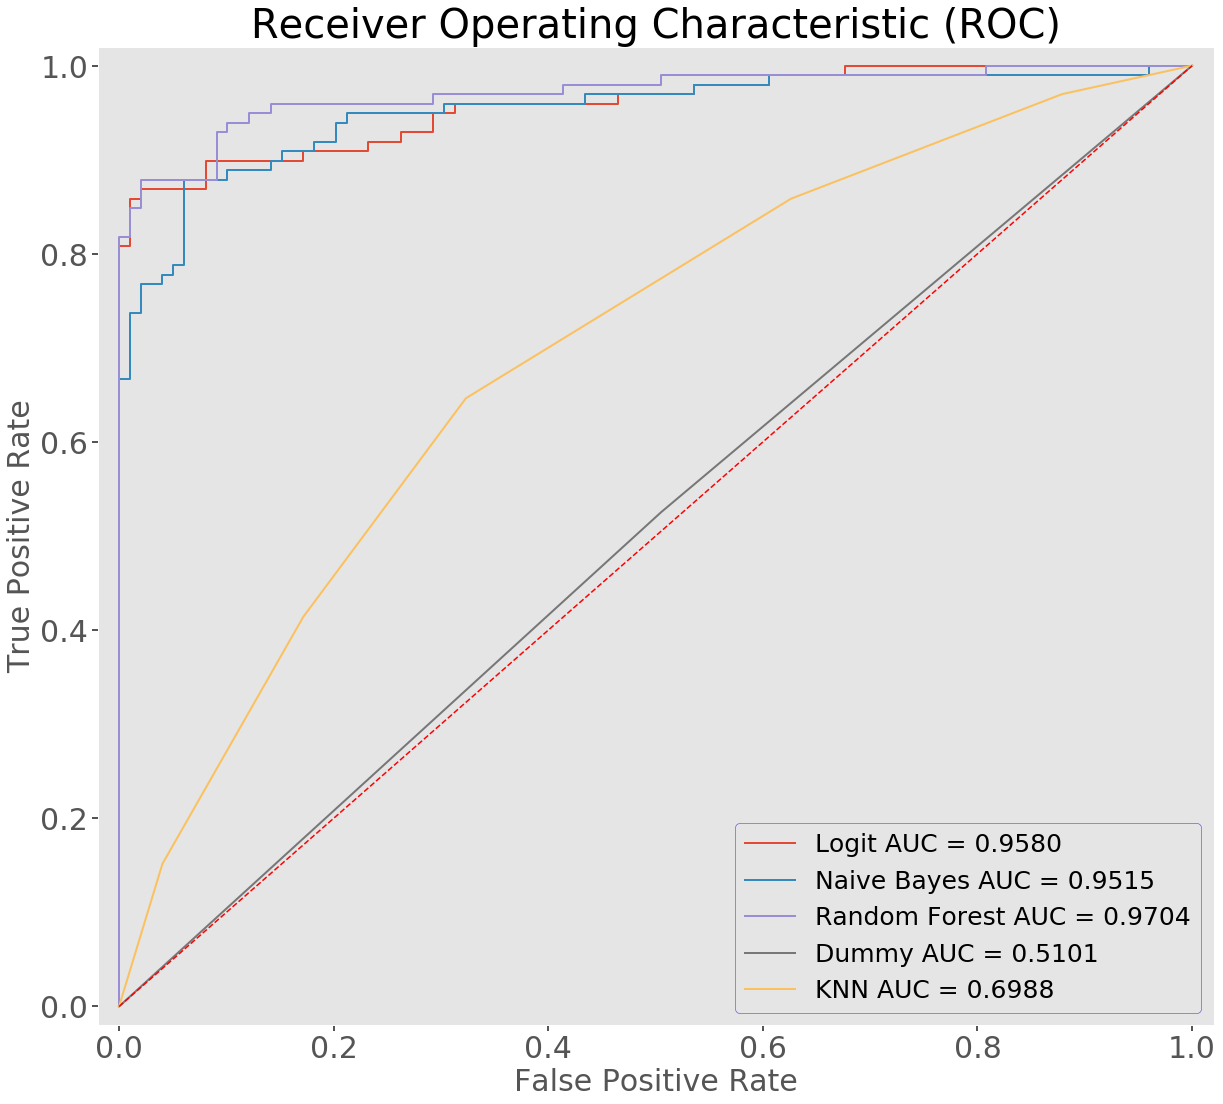

In [45]:
#in sample
roc_scores(X_val_under,y_val_under)

In [46]:
X_test.shape

(56962, 30)

In [47]:
y_test.shape

(56962,)

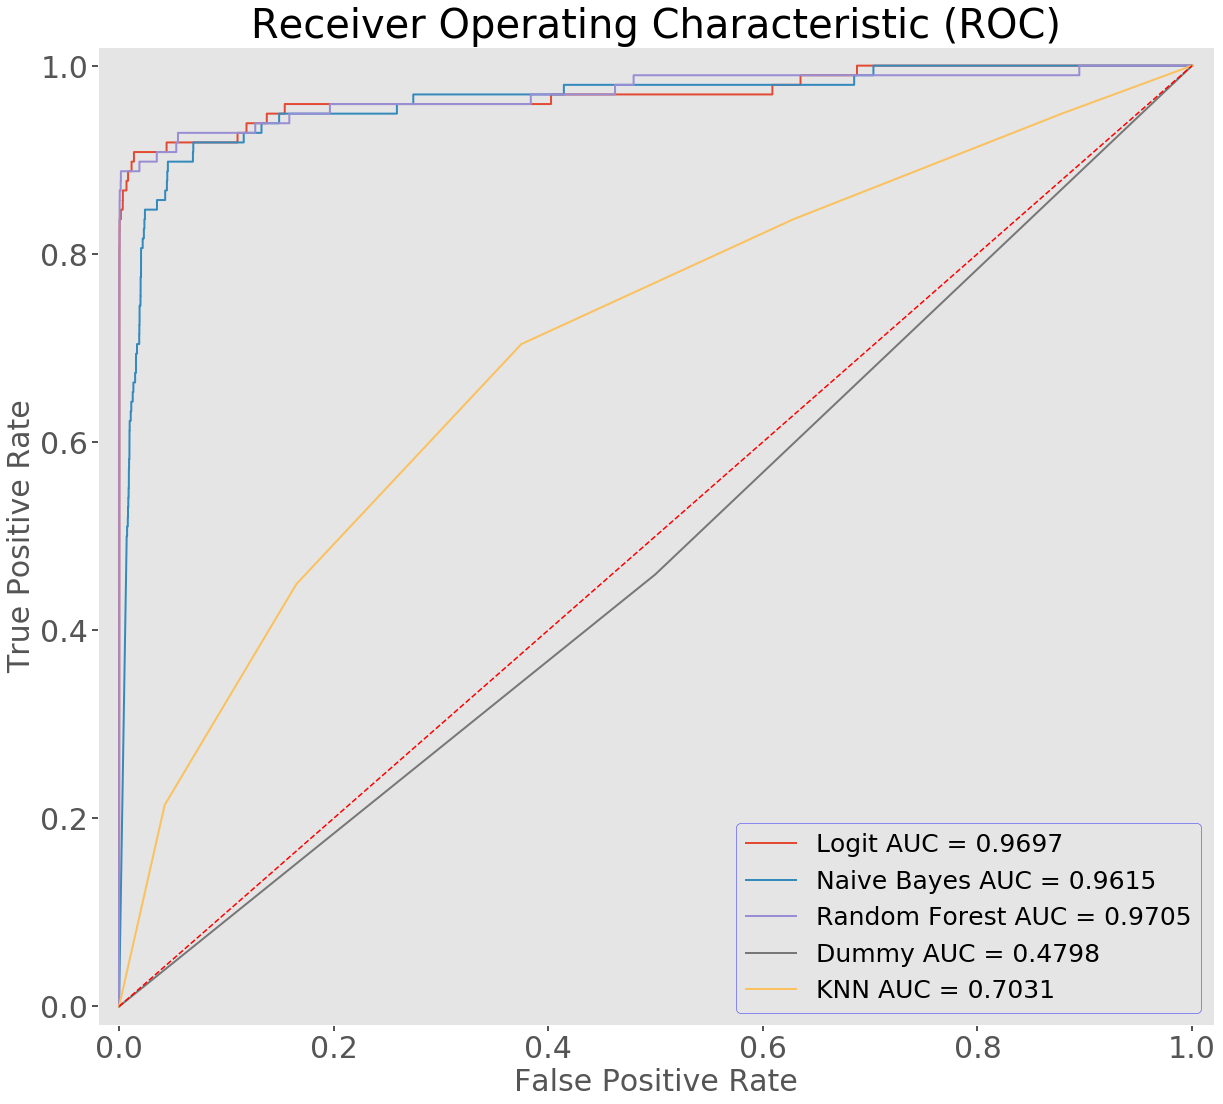

In [48]:
#out of sample
roc_scores(X_test,y_test)

### Recall (True Positive Rate): % of all fraudulent transactions cases captured
### Precision: Out of all items labeled as fraud, what percentage of them is actually fraud?
### False Positive Rate:

### Accuracy: How correct the model is (misleading for fraud/imbalanced data)

### F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

### Find the best threshold for each model

In [49]:
def find_best_threshold(model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict_proba(X_test)[:, 1] >= threshold) 
        f1 = f1_score(y_test,y_predict)
        acc = accuracy_score(y_test,y_predict)
        rec = recall_score(y_test,y_predict)
        pre = precision_score(y_test,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [50]:
models = [logistic_grid, gnb_best, rf_grid,knn_best]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest", "KNN"]
chart = list()
for item,name in zip(models,model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item,25)
#     print(f'Results for {name}:')
#     print('Best Threshold: ', best_thresh)
#     print('Highest_f1: ', high_f1)
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

In [51]:
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold','F1 Score','Accuracy','Recall','Precision'])

In [52]:
chart

,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,1.000,0.555,0.999,0.439,0.754
1,Naive-Bayes,1.000,0.175,0.992,0.469,0.107
2,Random Forest,0.917,0.806,0.999,0.765,0.852
3,KNN,0.833,0.017,0.956,0.214,0.009


### Confusion Matrix

In [53]:
def make_confusion_matrix_val(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_val, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

In [54]:
# #interactive confusion matrix
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix_val(rf_grid, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

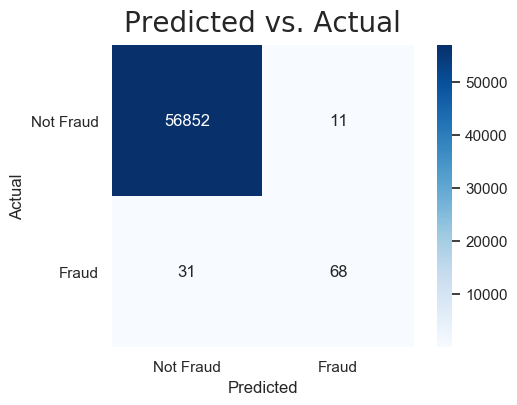

In [80]:
#fixed confusion matrix - random forest, validation
make_confusion_matrix_val(rf_grid, threshold=0.917)

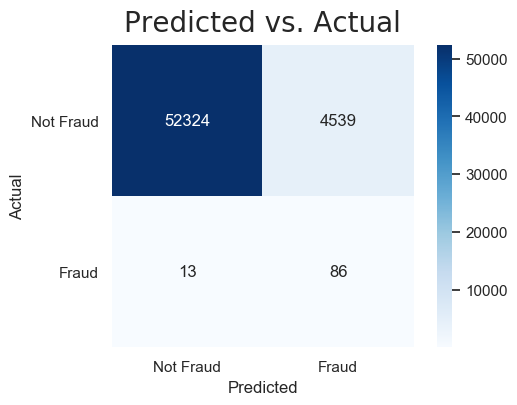

In [56]:
#fixed confusion matrix - logit, validation
make_confusion_matrix_val(logistic_grid, threshold=0.316)

In [81]:
def make_confusion_matrix_test(model, threshold=0.917):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

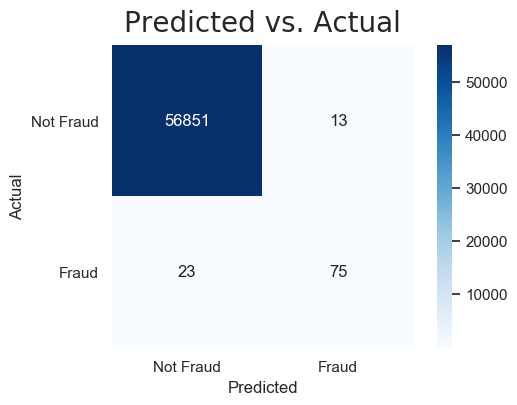

In [82]:
#fixed confusion matrix - random forest, test
make_confusion_matrix_test(rf_grid, threshold=0.917)

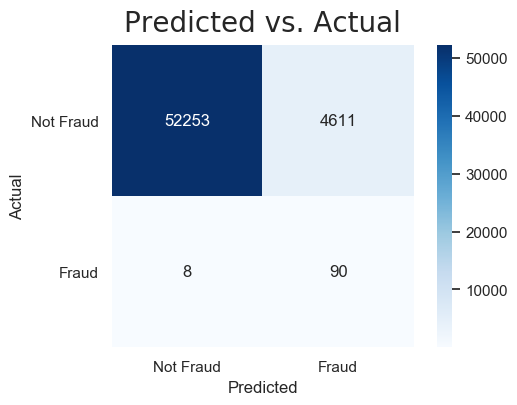

In [59]:
#fixed confusion matrix - logit, test
make_confusion_matrix_test(logistic_grid, threshold=0.316)

In [60]:
X_test.shape

(56962, 30)

In [61]:
y_test.shape

(56962,)

### Random Forest Final Prediction

In [62]:
# Random Forest
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = rf_grid.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.0864,   Recall: 0.8878


In [63]:
# using the new threshold of 0.891
y_predict = (rf_grid.predict_proba(X_test)[:,1] > 0.917)
print("Threshold of 0.895:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
# What about the threshold of 0.06?
y_predict = (rf_grid.predict_proba(X_test)[:, 1] > 0.917)
f1_score(y_test, y_predict)

Threshold of 0.895:
Precision: 0.8523,   Recall: 0.7653


0.8064516129032258

### Logistic Regression Final prediction

In [64]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = logistic_grid.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.0333,   Recall: 0.9184


In [65]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = (logistic_grid.predict_proba(X_test)[:,1] > 0.999987)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.6119,   Recall: 0.8367


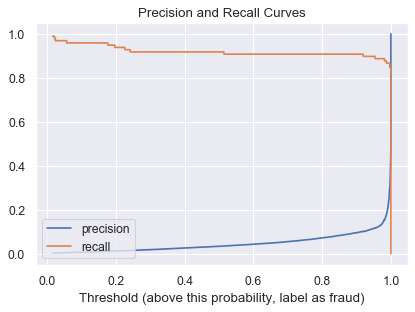

In [66]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, logistic_grid.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

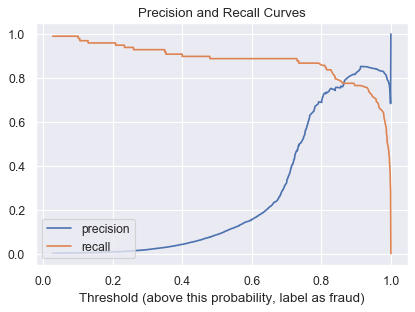

In [67]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf_grid.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

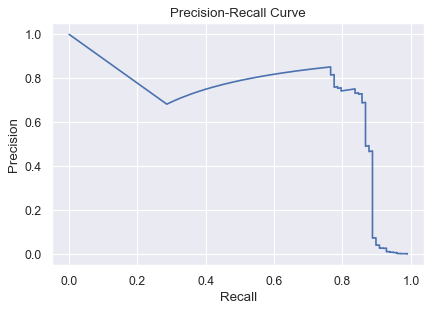

In [68]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [69]:
# Or we can just ask sklearn
y_predict = logistic_grid.predict(X_test)
f1_score(y_test, y_predict)

0.0642857142857143

In [70]:
# What about the threshold of 0.06?
y_predict = (logistic_grid.predict_proba(X_test)[:, 1] > 0.316)
f1_score(y_test, y_predict)

0.03750781412794333

In [71]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logistic_grid.predict_proba(X_test)[:,1])

ROC AUC score =  0.9697278074144684


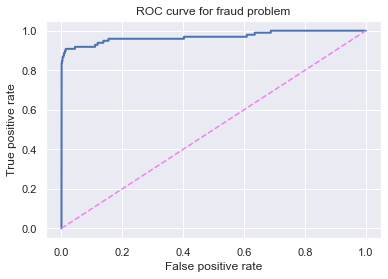

In [72]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test,logistic_grid.predict_proba(X_test)[:,1]))

In [73]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, logistic_grid.predict_proba(X_test))))

Log-loss on logit: 0.1937


In [74]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, logistic_grid.predict_proba(X_test)[:,1] > 0.999987)))

Log-loss on logit: 0.0412


In [75]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, rf_grid.predict_proba(X_test)[:,1] > 0.895)))

Log-loss on logit: 0.0236


In [76]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, rf_grid.predict_proba(X_test))))

Log-loss on logit: 0.1614


In [77]:
from sklearn.dummy import DummyClassifier

print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test, dummy.predict_proba(X_test))))

Log-loss on dummy classifier: 17.3027


In [78]:
print("Logistic accuracy: {:6.4f}".format(logistic_grid.score(X_test, y_test)))
print("Random Forest accuracy: {:6.4f}".format(rf_grid.score(X_test, y_test)))
print("Dummy accuracy: {:6.4f}".format(dummy.score(X_test, y_test)))

Logistic accuracy: 0.9697
Random Forest accuracy: 0.9705
Dummy accuracy: 0.5011
